#### Spidroin Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### RMSD calculation

In [3]:
rmsd_5 = pd.read_csv('data/spid/spid_RMSD_pH5.dat',sep='\t',names=['ref_mol', 'ref_frame', 'mol', 'frame', 'rmsd'],skiprows=1)
rmsd_7 = pd.read_csv('data/spid/spid_RMSD_pH7.dat',names=['frame','rmsd'],skiprows=1)

In [4]:
np.mean(rmsd_5['rmsd']),np.mean(rmsd_7['rmsd'])

(9.087796688341603, 15.008527472527474)

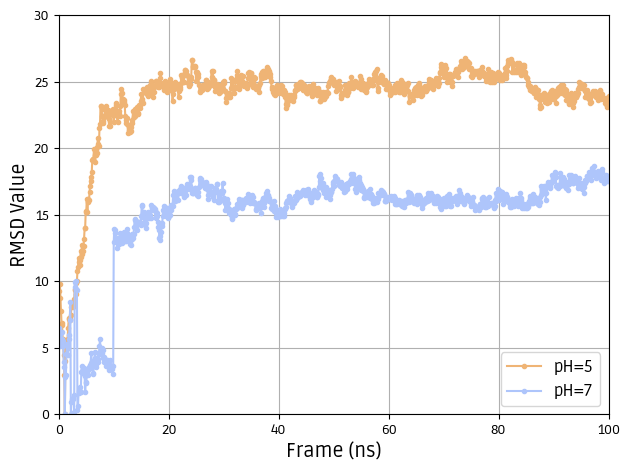

In [6]:
plt.plot(rmsd_5['frame'].iloc[:1001]/10,rmsd_5['rmsd'].iloc[:1001],marker='.',label='pH=5',color='#EFB475')
plt.plot(rmsd_7['frame'].iloc[1:1001]/10,rmsd_7['rmsd'].iloc[1:1001],marker='.',label='pH=7',color='#AEC5FB')

# plt.xlim(min(rmsd_5['frame'])-10,max(rmsd_5['frame'])+20)
# plt.ylim(min(rmsd_5['rmsd'])-0.2,max(rmsd_5['rmsd']))

plt.xlabel('Frame (ns)',fontsize=14);plt.ylabel('RMSD Value',fontsize=14)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.xlim(0,100)
plt.ylim(0,30)

plt.tight_layout()
plt.grid()
plt.legend(fontsize=12)
plt.savefig('results/spid_RMSD.png',dpi=500)

plt.show()

#### Distances

Spidroin formation occurs in the C-terminal (CT): 359LYS

`resid 359 and resname LYS`

`resid 1 and resname GLY`

In [7]:
distances_pH5 = pd.read_csv('data/spid/spid_distances_pH5.dat',sep='\t',names=['Frame','Distance'])
distances_pH7 = pd.read_csv('data/spid/spid_distances_pH7.dat',sep='\t',names=['Frame','Distance'])

In [8]:
np.mean(distances_pH5['Distance']),np.mean(distances_pH7['Distance'])

(104.52701264271457, 63.59084444510978)

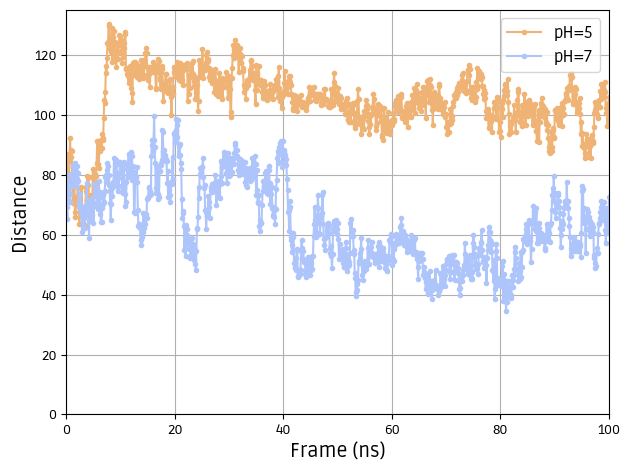

In [13]:
plt.plot(distances_pH5['Frame']/10,distances_pH5['Distance'],marker='.',label='pH=5',color='#EFB475')
plt.plot(distances_pH7['Frame']/10,distances_pH7['Distance'],marker='.',label='pH=7',color='#AEC5FB')

# plt.axhline(y=100,color='gray',linestyle='--')

# plt.xlim(min(distances['Frame'])-10,max(distances['Frame'])+20)
# plt.ylim(min(distances['Distance'])-0.2,max(distances['Distance'])+2)

plt.xlim(0,100),plt.ylim(0,135)

plt.xlabel('Frame (ns)',fontsize=14);plt.ylabel('Distance',fontsize=14)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('results/spid_dist.png',dpi=500)

plt.show()

#### Nt2Rep

In [7]:
rmsd_tmp = pd.read_csv('data/nt2rep/tmp_rmsd.dat',sep='\t')
rmsd_ctl = pd.read_csv('data/nt2rep/ctl_rmsd.dat',sep='\t')

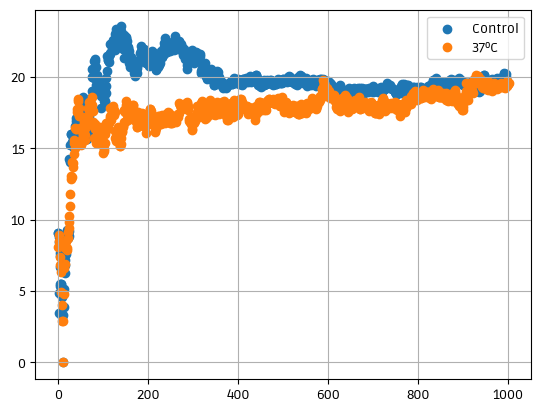

In [13]:
plt.scatter(rmsd_tmp['frame'].iloc[:1001],rmsd_tmp['   rmsd'].iloc[:1001],label='Control')
plt.scatter(rmsd_ctl['frame'].iloc[:1001],rmsd_ctl['   rmsd'].iloc[:1001],label='37ºC')
plt.legend(),plt.grid()
plt.show()

In [20]:
rgyr_tmp = pd.read_csv('data/nt2rep/tmp_rgyr.dat',names=['Frame','RgYr'],sep=' ')
rgyr_ctl = pd.read_csv('data/nt2rep/tmp_rgyr.dat',names=['Frame','RgYr'],sep=' ')

In [23]:
rgyr_ctl

,Frame,RgYr
0,0,30.954306
1,1,32.910587
2,2,33.129154
3,3,32.746372
4,4,31.960546
...,...,...
992,992,23.036953
993,993,22.930033
994,994,23.052574
995,995,23.150478


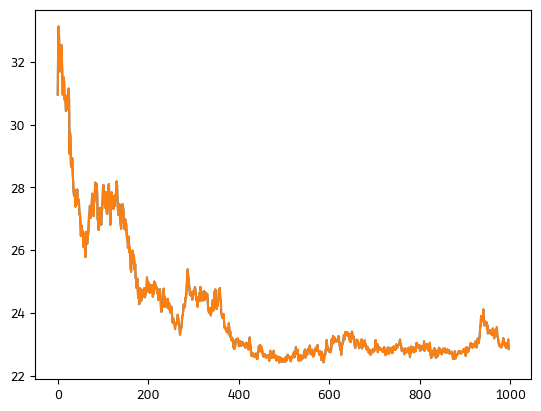

In [21]:
plt.plot(rgyr_ctl['Frame'],rgyr_ctl['RgYr'],label='Control')
plt.plot(rgyr_tmp['Frame'],rgyr_tmp['RgYr'],label='Control')

In [26]:
ramp = pd.read_csv('data/nt2rep/trajrmsd.dat',sep='\t')

Text(0, 0.5, 'RMSD')

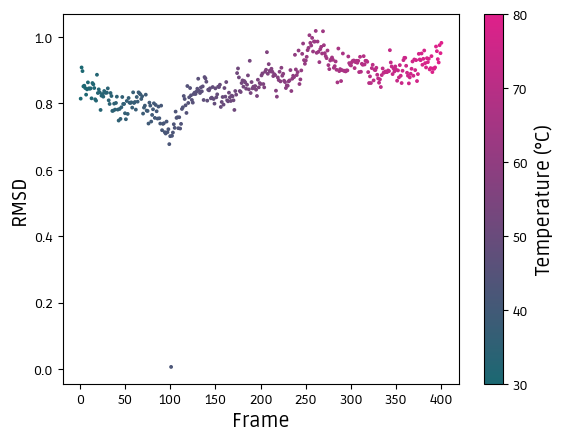

In [39]:
import matplotlib.colors as mcolors

data = ramp['   rmsd'].iloc[:400]
num_frames = len(data)

temperatures = np.concatenate([
    np.linspace(30,80, num_frames)])

cmap = mcolors.LinearSegmentedColormap.from_list(
    'blue_red_blue', [(0, '#1B6872'), (0.5, '#DF208A'), (1, '#1B6872')]
)

cmap2 = mcolors.LinearSegmentedColormap.from_list(
    'blue_red_blue', [(0, '#1B6872'), (1, '#DF208A')])

sc2 = plt.scatter(ramp['frame'].iloc[:400],ramp['   rmsd'].iloc[:400], c=temperatures, cmap=cmap2, alpha=1, s=3)
cbar = plt.colorbar(sc2)
cbar.set_label('Temperature (°C)', fontsize=14)

plt.xlabel('Frame',fontsize=14)
plt.ylabel('RMSD',fontsize=14)